## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([
    (1,0),
    (1,2),
    (2,3),
    (3,4)
])

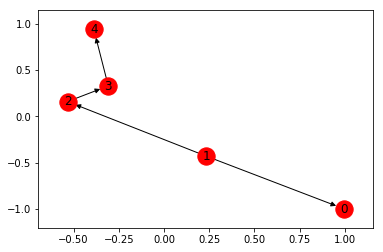

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[-0.38753535,  0.7750707 , -0.48408611,  0.11927319, -0.02272242],
        [ 0.11963275, -0.2392655 , -0.2567756 ,  0.81735626, -0.44094791],
        [ 0.15167188, -0.30334376, -0.6222756 ,  0.07212939,  0.70181809]])

In [8]:
sigma

array([[ 0.23511383, -0.02318096, -0.02938911],
       [-0.02318096,  0.3575863 ,  0.00907246],
       [-0.02938911,  0.00907246,  1.12604987]])

In [9]:
print(eqL)

[[ 3.33333333e-01 -6.66666667e-01  3.33333333e-01 -1.25796230e-16
   8.64744112e-17]
 [-6.66666667e-01  1.33333333e+00 -6.66666667e-01 -1.05996046e-16
   3.67885457e-17]
 [ 3.33333333e-01 -6.66666667e-01  8.33333333e-01 -5.00000000e-01
   2.77889606e-16]
 [ 1.86611815e-16  5.58107597e-16 -5.00000000e-01  1.00000000e+00
  -5.00000000e-01]
 [-4.89643069e-16  3.83185119e-16 -5.25825578e-17 -5.00000000e-01
   5.00000000e-01]]


In [10]:
posG, negG = separate_graphs(eqL)

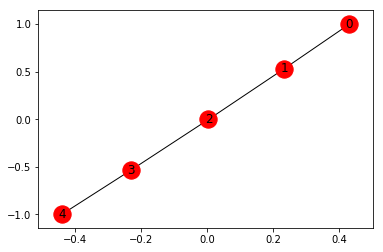

In [12]:
nx.draw_networkx(posG)

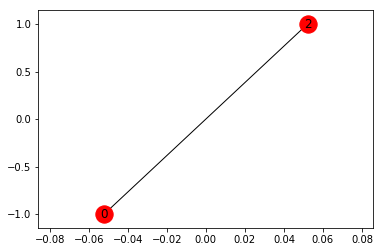

In [13]:
nx.draw_networkx(negG)